In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
suffolk_df = pd.read_csv('suffolk_merged_acs+epa_tracts.csv')

In [25]:
suffolk_df.head(2)

,GEO_ID,ID,NAME,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,DP05_0063E,DP05_0063M,DP05_0064E,...,RESP,RSEI_AIR,PTRAF,PRE1960,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS
0,1400000US25025000201,25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",Massachusetts,MA,Suffolk,1,4125,253,3361,...,0.3,4356.252038,863.891322,1308.0,0.709712,0.085904,0.120828,13.385100,1.433462,0.002310
1,1400000US25025000202,25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",Massachusetts,MA,Suffolk,1,4461,377,3340,...,0.3,4422.413875,736.756283,1179.0,0.763107,0.087418,0.130583,19.255717,2.800577,0.001759


In [26]:
suffolk_df.columns

Index(['GEO_ID', 'ID', 'NAME', 'STATE_NAME', 'ST_ABBREV', 'CNTY_NAME',
       'REGION', 'DP05_0063E', 'DP05_0063M', 'DP05_0064E', 'DP05_0064M',
       'DP05_0065E', 'DP05_0065M', 'DP05_0067E', 'DP05_0067M', 'DP05_0071E',
       'DP05_0071M', 'PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'RSEI_AIR',
       'PTRAF', 'PRE1960', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST',
       'PWDIS'],
      dtype='object')

In [27]:
rel_col = ['GEO_ID', 'DP05_0065E', 'PM25', 'OZONE', 'DSLPM', 'CANCER', 'RESP', 'RSEI_AIR',
       'PTRAF', 'PRE1960', 'PNPL', 'PRMP', 'PTSDF', 'UST',
       'PWDIS']

EDA for Black Population

In [28]:
bp_suffolk = suffolk_df[rel_col].dropna()

In [29]:
bp_suffolk.head(2)

,GEO_ID,DP05_0065E,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PTRAF,PRE1960,PNPL,PRMP,PTSDF,UST,PWDIS
0,1400000US25025000201,357,7.237915,57.31368,0.342112,20.0,0.3,4356.252038,863.891322,1308.0,0.085904,0.120828,13.385100,1.433462,0.002310
1,1400000US25025000202,439,7.241805,57.40047,0.345565,20.0,0.3,4422.413875,736.756283,1179.0,0.087418,0.130583,19.255717,2.800577,0.001759


In [30]:
bp_suffolk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 178
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GEO_ID      175 non-null    object 
 1   DP05_0065E  175 non-null    int64  
 2   PM25        175 non-null    float64
 3   OZONE       175 non-null    float64
 4   DSLPM       175 non-null    float64
 5   CANCER      175 non-null    float64
 6   RESP        175 non-null    float64
 7   RSEI_AIR    175 non-null    float64
 8   PTRAF       175 non-null    float64
 9   PRE1960     175 non-null    float64
 10  PNPL        175 non-null    float64
 11  PRMP        175 non-null    float64
 12  PTSDF       175 non-null    float64
 13  UST         175 non-null    float64
 14  PWDIS       175 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 21.9+ KB


In [31]:
bp_suffolk.describe()   

,DP05_0065E,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PTRAF,PRE1960,PNPL,PRMP,PTSDF,UST,PWDIS
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,1147.822857,7.212321,58.514529,0.497045,27.028571,0.337143,4394.099014,1636.119941,1029.337143,0.163175,0.415482,21.189501,6.190316,3.601965e-02
std,1364.858983,0.072742,0.650839,0.109402,4.706841,0.051894,1260.000475,1902.660287,547.797865,0.227178,0.396221,16.037388,5.128282,9.064670e-02
min,0.000000,6.936636,57.242250,0.286989,20.000000,0.200000,2618.857812,80.844057,0.000000,0.055476,0.094937,2.593028,0.000000,4.628001e-08
25%,170.500000,7.186691,58.114825,0.423184,20.000000,0.300000,3573.587911,361.839493,653.000000,0.078682,0.181955,7.246836,2.821797,1.033486e-06
50%,583.000000,7.238367,58.439790,0.505381,30.000000,0.300000,4046.409827,799.537167,994.000000,0.100731,0.324204,16.102014,4.844236,1.417692e-03
75%,1669.000000,7.257363,58.753490,0.554389,30.000000,0.400000,4667.416011,2232.739537,1408.500000,0.150544,0.545754,30.829268,8.180788,1.038936e-02
max,6997.000000,7.294128,60.572200,0.893491,40.000000,0.500000,9002.490660,9940.183882,2897.000000,2.034377,3.285610,61.310540,37.717144,5.395088e-01


In [32]:
bp_suffolk.corr(numeric_only=True)

,DP05_0065E,PM25,OZONE,DSLPM,CANCER,RESP,RSEI_AIR,PTRAF,PRE1960,PNPL,PRMP,PTSDF,UST,PWDIS
DP05_0065E,1.000000,0.188874,-0.059504,-0.237816,-0.042335,-0.302317,0.139676,-0.211900,0.244296,0.328318,-0.071991,-0.362090,-0.003174,-0.050053
PM25,0.188874,1.000000,-0.858782,0.195789,0.256282,-0.161359,0.380722,0.086238,-0.123025,0.141546,-0.104986,0.233199,0.213906,-0.619820
OZONE,-0.059504,-0.858782,1.000000,0.075748,0.065935,0.210844,-0.594606,0.006093,0.090507,-0.234829,0.248086,-0.096320,-0.119932,0.532333
DSLPM,-0.237816,0.195789,0.075748,1.000000,0.643818,0.582700,-0.561751,0.562082,-0.095254,-0.416503,0.350851,0.779053,0.122599,-0.129970
CANCER,-0.042335,0.256282,0.065935,0.643818,1.000000,0.477980,-0.464889,0.322934,-0.030146,-0.346078,0.330601,0.523627,0.171460,-0.111386
RESP,-0.302317,-0.161359,0.210844,0.582700,0.477980,1.000000,-0.448439,0.588096,-0.025775,-0.271923,0.406345,0.720171,0.136327,0.160454
RSEI_AIR,0.139676,0.380722,-0.594606,-0.561751,-0.464889,-0.448439,1.000000,-0.287637,-0.063250,0.591692,-0.377543,-0.382568,-0.042503,-0.281115
PTRAF,-0.211900,0.086238,0.006093,0.562082,0.322934,0.588096,-0.287637,1.000000,0.000079,-0.211621,0.265026,0.688518,0.107228,-0.058565
PRE1960,0.244296,-0.123025,0.090507,-0.095254,-0.030146,-0.025775,-0.063250,0.000079,1.000000,0.100859,-0.123862,-0.141139,-0.031131,0.029255
PNPL,0.328318,0.141546,-0.234829,-0.416503,-0.346078,-0.271923,0.591692,-0.211621,0.100859,1.000000,-0.235981,-0.323043,-0.004656,-0.164833


<Axes: >

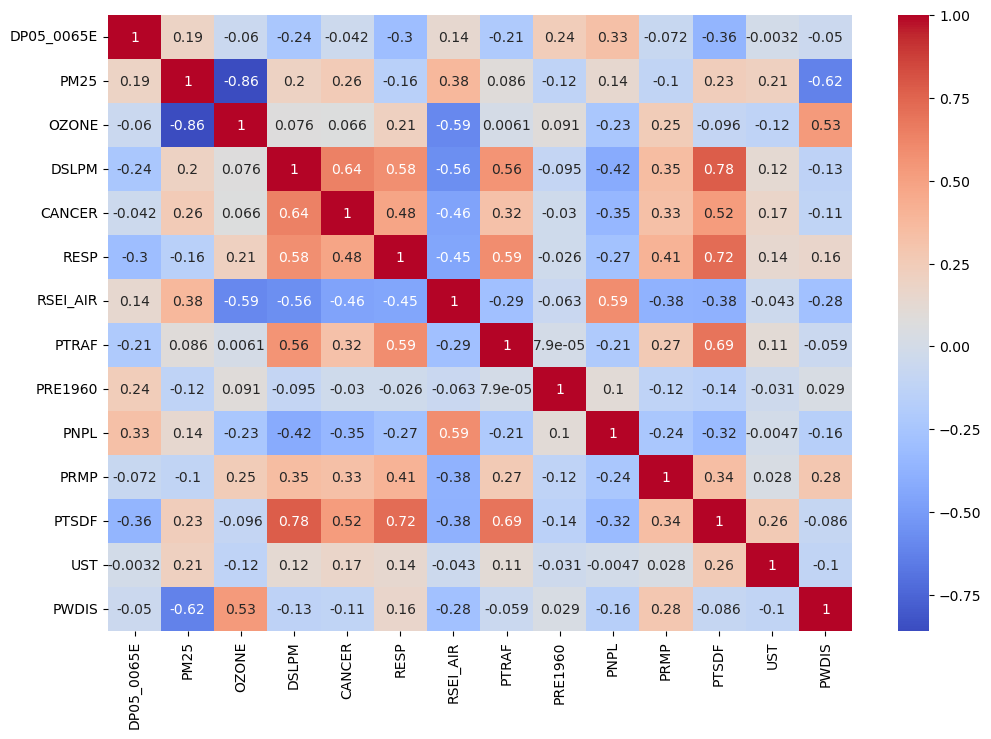

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(bp_suffolk.corr(numeric_only=True), annot=True, cmap='coolwarm')

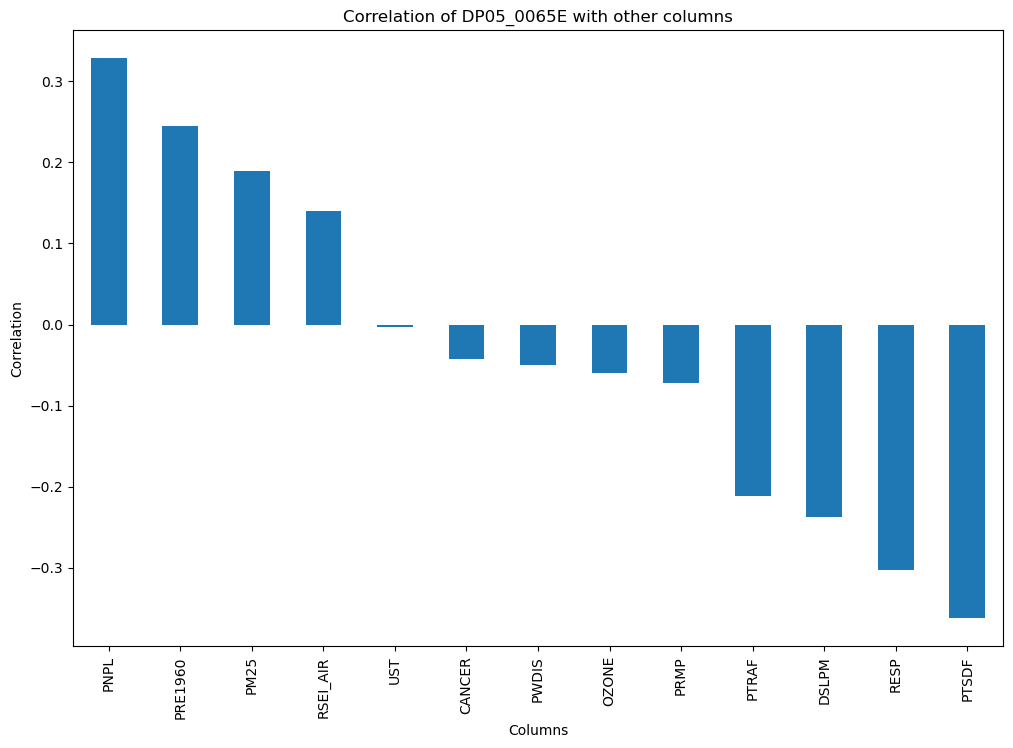

In [35]:
bp_suffolk.corr(numeric_only=True)['DP05_0065E'].sort_values(ascending=False).drop('DP05_0065E').plot(kind='bar', figsize=(12,8))

plt.title('Correlation of DP05_0065E with other columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()


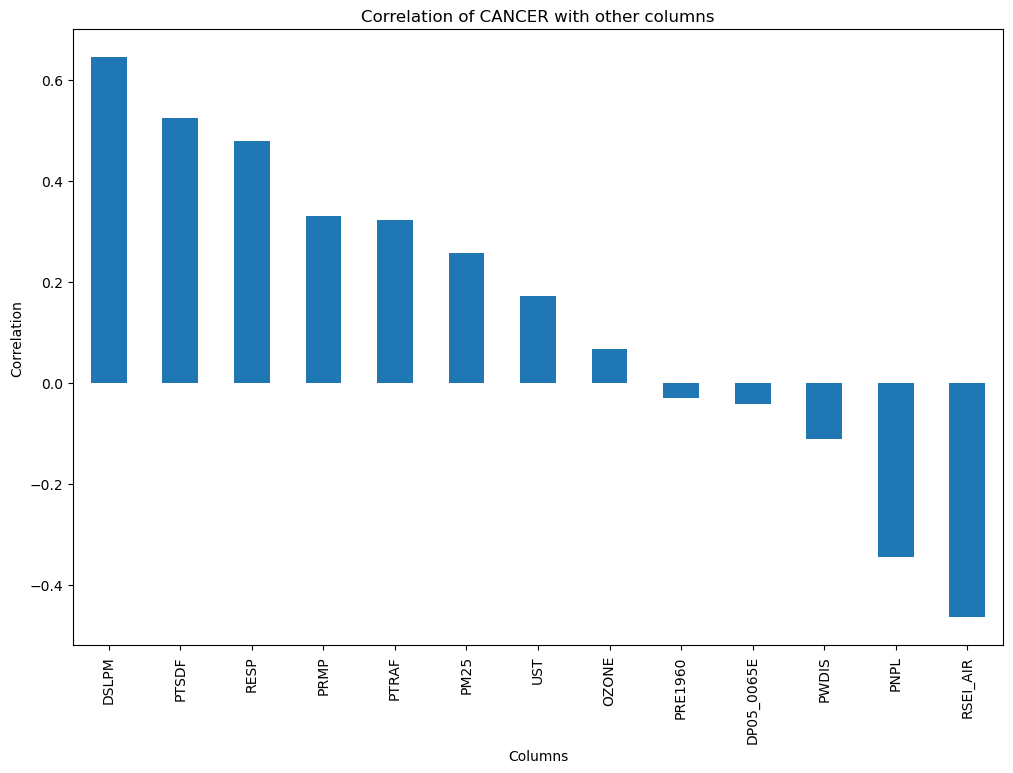

In [38]:
bp_suffolk.corr(numeric_only=True)['CANCER'].sort_values(ascending=False).drop('CANCER').plot(kind='bar', figsize=(12,8))

plt.title('Correlation of CANCER with other columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()